# Session 10: Introduction to modeling and machine learning
In this combined teaching module and exercise set you will get an introduction to modeling using data. We proceed with introducing machine learning, and will get your first taste of how machine learning algorithms are constructed. You will implement a [_perceptron_](https://en.wikipedia.org/wiki/Perceptron) from scratch using the matrix-algebra library NumPy. We will train this model on the iris data to predict flower types. 

Many of the concepts both programming-wise and related to machine learning are probably new to most of you - don't be afraid to ask questions about either, as much of this lecture/exercise set lays the foundation for the upcoming sessions. 

The structure of the notebook is that the beginning will contain a lot of lecturing material. However, towards the end you will find a few exercises. To a few of you, there may be some new mathematical terms - I have tried to provide som references where you can study these more. However, the focus should be on understanding the high-level concepts rather than machine learning. Raschka's chapter 2 is also excellent companion for this module.

# Modeling and machine learning.
In the video below we introduce modeling. We focus on problems where for some given input we want to make a model of some  output/target data (which can be anything). See the video below where the concepts are introduced.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('BTsgia9goJA', width=640, height=360)

### Trade-offs in modeling
We proceed with showcasing some of the inherent trade-offs in modeling. When estimating models at some point we face a dilemma between two disadvantages in prediction - underfitting and overfitting. The video belows demonstrates using real data how these two problems can arise. In the video I talk about some mathemetical concepts, here are some links if you want a review: [derivative](https://en.wikipedia.org/wiki/Derivative), [polynomial](https://en.wikipedia.org/wiki/Polynomial), [Taylor expansion/series](https://en.wikipedia.org/wiki/Taylor_series).

In [ ]:
YouTubeVideo('6WdAfFadgkY', width=640, height=360)

### Machine learning - essential concepts
We are now ready to introduce the main terminology of machine learning. Basically there are two big problems that machine learning attempts to solve - supervised and unsupervised learning. Watch the video below for an introduction of these concepts and an overview of machine learning we will work with in this course.

In [ ]:
YouTubeVideo('c6wUs7QYea4', width=640, height=360)

### Supervised learning concepts
In the rest of this course and this notebook we dive more into supervised machine learning model. In the next video we hear more about the main problems and set the terminology.

In [ ]:
YouTubeVideo('6cdy9txTQIM', width=640, height=360)

# The perceptron model

The first supervised learning model we will introduce is an old model. We will learn about it because it simple enough to grasp how it works and we will use to build the intuition for more advanced models. The video below introduces the model theoretically with mathematics. 

Parts of the talk will use matrices to make computations, thus you may want to re-familiarize yourself with [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) before starting.

In [ ]:
YouTubeVideo('p4_MxERHo_8', width=640, height=360)

### Implementing and using the model in Python

We now implement our model in Python. We make the implementation using vector notation, as you will implemented in a simpler version below :). The video also shows how we can use others' code, in this Raschka's implementation of the Perceptron. You can see where Raschka's code is loaded by checking out the slides.

In [ ]:
YouTubeVideo('QvY_KTZXfh0', width=640, height=360)

### Validation of model

We want to have a credible measure of model performance. In this video I talk about a simple approach to getting such a measure for cross-section/static data (i.e. not time series).

In [ ]:
YouTubeVideo('9KNJZbFGmMc', width=640, height=360)



> **Ex. 10.1.1:** The mathematics and biological reasoning which justifies the perceptron model is presented in Raschka, 2017 on pages 18 to 24. If you haven't read it already, quickly do so. 
>
> Begin by importing `numpy`, `pandas` and `seaborn`

In [ ]:
# [Answer to Ex. 10.1.1]

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

> **Ex. 10.1.2:** Use the following code snippet to load the iris data. The code will create two new variablex **X** and **y**, each of which are numpy arrays. Split the data as follows. The first dataset should contain the first 70 rows; we call this sample our *training dataset*, or simply *train data*. We use the training data to estimate the data. We use the remaining rows as data for testing our model, thus we call it *test data*. 
>
>```python 
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac=1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))
sns.pairplot(iris, hue="species", palette="husl", diag_kws = {'shade': False})
plt.show()
```

In [2]:
# [Answer to Ex. 10.1.2]

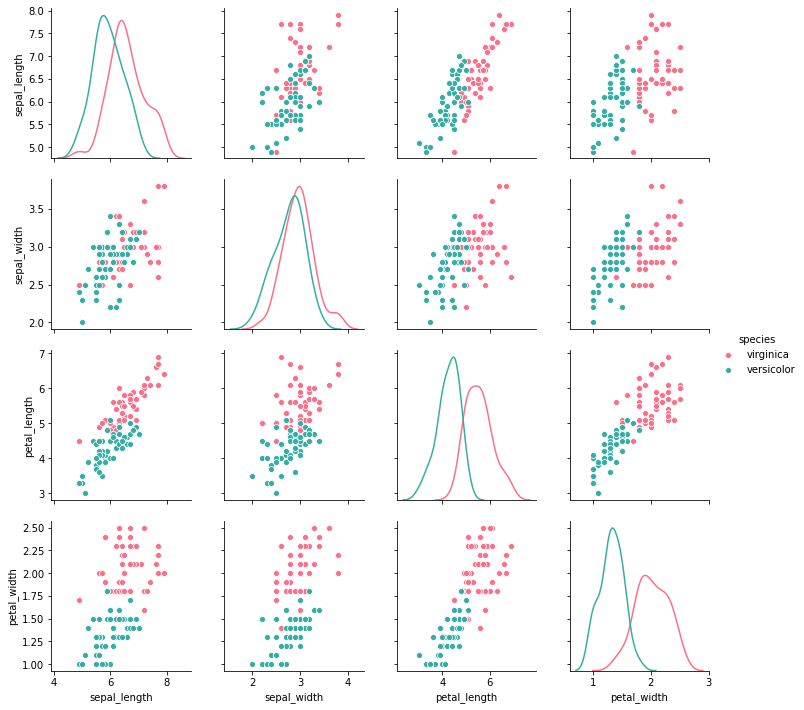

In [3]:
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac = 1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))
sns.pairplot(iris, hue="species", palette="husl", diag_kws = {'shade': False})
plt.show()

# A very simple deterministic test-train split 
Xtrain = X[:70]
ytrain = y[:70]

Xtest = X[70:]
ytest = y[70:]

> **Ex. 10.1.3:** Write a function which initiate a set of weights `w` with length 1 larger than the number of features in your data. Ensure that your initial weights are not exactly 0, but close to it. 
>
>> _Hint 1:_ Use [np.random.RandomState](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html) to set up a random number generator from which you can draw from a normal with mean 0 and scale 0.01. 
>
>> _Hint 2:_ Say you have stored the random number generator in an object called `rgen`. You can then call `rgen.normal(size = 1 + columns_in_X)` to get the weights you want. You might want to tweak the `scale` parameter.

In [ ]:
# [Answer to Ex. 10.1.3]

In [ ]:
def random_weights(location = 0.0, scale = 0.01, seed = 1):
    # Init random number generator
    rgen = np.random.RandomState(seed)
    w = rgen.normal(loc=location, scale=scale, size= 1 + X.shape[1])
    
    return w

> **Ex. 10.1.4:** In this problem you need to write two functions:
> * `net_input(X, W)`: calculates _and returns_ the net-input, i.e the linear combination of features and weights, $z=w_0 + \sum_k x_{k} w_{k}$
> * `predict(X, W)`: a step function which returns 1 if the net activation is $\geq$ 0, and returns -1 otherwise. 
>
>*Bonus:* Create a function which calculates the _accuracy_ (the share of cases that are correctly classified). The function should take a vector of y-values and a vector of predicted y-values as input. What is the accuracy of your untrained model on the training data?

>> _Hint 1:_ you can compute the above using an array product. Here numpy's array product named `dot` may be useful

>> _Hint 2:_ remember to include the bias, $w_0$, in the computation!


In [ ]:
# [Answer to Ex. 10.1.4]

In [ ]:
def net_input(X, W): 
    return np.dot(X, W[1:]) + W[0]   # Linear product X'W + bias


def predict(X, W):
    linProd = net_input(X, W)
    return np.where(linProd > 0.0, 1, -1)    # 1(linProd > 0)

# Bonus
def accuracy(y, prediction):
    return np.mean(y == prediction)

accuracy(ytrain, predict(Xtrain, random_weights()))


> **Ex. 10.1.5:** Write a function whichs loops over the training data (both X and y) using `zip`. For each row in the data, update the weights according to the perceptron rule (remember to update the bias in `w[0]`!). Set $\eta = 0.1$.
>
> Make sure the loop stores the total number of prediction errors encountered underways in the loop by creating an `int` which is incremented whenever you update the weights. 
>
>> _Hint:_ your function should return the updated weights, as well as the number of errors made by the perceptron.
>
>> _Hint:_ The following code block implements the function in _pseudo_code (it wont run, but serves to communicate the functionality).
>> ```
>> function f(X, y, W, eta):
>>    set errors = 0
>>
>>    for each pair xi, yi in zip(X,y) do:
>>        set update = eta * (yi - predict(xi, W))
>>        set W[1:] = W[1:] + update * xi
>>        set W[0] = W[0] + update
>>        set errors = errors + int(update != 0) 
>>
>>    return W, errors
>> ```
>
> *Bonus:* If you completed the previous bonus exercise (for 10.1.4), calculate the accuracy on training data using the updated weights as input in the predict function. Any progress yet?

In [ ]:
# [Answer to Ex. 10.1.5]

In [ ]:
# This will be in assignment 2

> **Ex. 10.1.6:** Write a function, which repeats the updating procedure (calls the function) you constructed in 10.1.5 for `n_iter` times by packing the whole thing in a loop. Make sure you store the number of errors in each iteration in a list. 
>
> Plot the total errors after each iteration in a graph.
>
>> _Hint:_ Make sure you dont reset the weights after each iteration.
>
>> _Hint:_ Once again some pseudocode:
>> ```
>> function g(X, y, n_iter):
>>     set eta = 0.1
>>     set weights = random_weights()
>>     set errorseq = list()
>>
>>     for each _ in range(n_iter):
>>         weights, e = f(X, y, weights, eta) 
>>         errorseq.append(e)
>>
>>     return weights, errorseq
>> ```


In [ ]:
# [Answer to Ex. 10.1.6]

In [ ]:
# This will be in assignment 2

> **Ex. 10.1.7 (BONUS):** Use the updated weights when predicting and calculate the accuracy of your perceptron on the test data?  

In [ ]:
# [Answer to Ex. 10.1.7 BONUS] 

In [ ]:
pred = predict(Xtest, trained_w)
accuracy(ytest, pred)

> **Ex.10.1.8 (BONUS):** Restructure your code as a class called `Perceptron` with `.fit()` and `.predict()` methods (you) will probably need more helper methods. Store hyperparameters as eta and the number of iterations as class attributes.

In [ ]:
# [Answer to Ex. 10.1.8 BONUS] 

In [ ]:
class Perceptron:
    """ Implements the simple perceptron algo
    """

    def __init__(self, X, y, eta = 0.1, n_iter = 50, seed = 1):
        """ Populate instance with relevant parameters and data
        """
        self.n_iter = n_iter
        self.eta = eta      
        self.seed = seed         
        
        self._errseq = []
        self._shape = X.shape[1]
        self._w = self._random_weights()

        self.X = X
        self.y = y

    def _random_weights(self, loc = 0.0, scale = 0.01):
        """ Initiates weights as random and close to 0
        """
        # Init random number generator
        rgen = np.random.RandomState(self.seed)
        w = rgen.normal(loc=loc, scale=scale, size= 1 + self._shape)

        return w
    
    def _net_activation(self, X):
        """ Calculate X'w
        """
        return np.dot(X, self._w[1:]) + self._w[0]   # Linear product W'X
    
    def accuracy(self, prediction):
        """ Assess accuracy
        """
        return np.mean(self.y == prediction)   
 
    def predict(self, X = None):
        """ Create predictions from trained (/untrained) classifier
        """
        if X is None:
            X = self.X        
        linProd = self._net_activation(X)
        return np.where(linProd >= 0.0, 1, -1)    # 1(linProd > 0)

    def _perceptronEpoch(self):
        """ One epoch of the perceptron algo
        """
        errors = 0
        # For each pair (x-row, y-row) in the data
        for xi, yi in zip(self.X, self.y):

            # Do the updating process described in Raschka
            update = self.eta * (yi - self.predict(xi))    # Notice this is 0 if target == predicted
            self._w[1:] = self._w[1:] + update * xi      # Update weights
            self._w[0] = self._w[0] + update            # Update bias

            errors += int(update != 0.0)    # keep count of the errors in this iteration
        self._errseq.append(errors)

        return self

    def fit(self):
        """ Fit the perceptron 
        """
        for _ in range(self.n_iter):
            
            self._perceptronEpoch()
            
        return self
        

In [ ]:
p = Perceptron(X = Xtrain, y= ytrain).fit()
plt.plot(p._errseq, 'b-o') 

# Beyond the perceptron model

Having seen and worked with the perceptron I want to provide you with some ideas on how we can change parts of the perceptron to obtain another model. Again, you may want to familiarize yourself with background concepts: [gradient](https://en.wikipedia.org/wiki/Gradient), [sum of squared errors](https://en.wikipedia.org/wiki/Residual_sum_of_squares) and the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function).

In [ ]:
YouTubeVideo('q4_NGRPHOPU', width=640, height=360)

## Logistic regression 

Logistic regression is another simple linear machine-learning algorithm, you can read about it [here:](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)


> **Ex. 10.2.1:** Import the LogisticRegression classifier from `sklearn.linear_model`. Create a new object called `clf` like:
```
clf = LogisticRegression()
```
All scikit learn models have two fundamental methods `.fit()` and `.predict()`. Fit your model to the training data, and store the fitted model in a new object. Import _accuracy_score_ from `sklearn.metrics` and asses the accuracy of the LogisticRegression on both your training data and your test data.

In [ ]:
# [Answer to Ex. 10.2.1]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(solver='lbfgs')
fitted_model = clf.fit(Xtrain, ytrain)

train_score = accuracy_score(ytrain, fitted_model.predict(Xtrain))
test_score = accuracy_score(ytest, fitted_model.predict(Xtest))

print(f"On the training data we get a score of {round(train_score, 2)}, while the score on the test data is {round(test_score, 2)}")

## AdaLine (BONUS)
AdaLine is a modified version of the perceptron. The only difference lies in the way the two models learn from their training data, i.e. the optimization method used. The perceptron used the binary classifications for learning, while AdaLine only applies the binary threshold after training, and thus uses real valued numbers when learning. 
>> _Hint:_ Most of the code for this exercise can be written by copying and modifying code from exercise 10.1.

> **Ex. 10.3.1 (BONUS):** Implement two functions described below. You shold reuse your `net_input` from Ex. 10.1.4.:
* `ada_activation_function`: the identify function $ada\_activation(z) = z$
* `ada_predict`: A step function   $ada\_predict(z) = 1 \ if \ z \geq 0  \ else \ 0$ where z is the output of _the activation function_.



> The following figure might help you understand how each of these functions relate to the algorithm, and how the perceptron and adaline differ:
![asd](https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png)

In [ ]:
# [Answer to Ex. 10.3.1 BONUS]

In [ ]:
def ada_activation(Z):
    return Z
    
def ada_predict(X, W):
    linProd = net_input(X, W)
    act = ada_activation(linprod)
    return np.where(act >= 0.0, 1, -1)    # 1(linProd > 0)


> **Ex. 10.3.2 (BONUS):** AdaLine uses a _cost function_ to quantize the accuracy of the classifier this is given by 
>$$ 
cost(X,y,W) = \frac{1}{2} \sum_{i=1}^N (y_i - activation(z_i) )^2 , \qquad z_i = net\_input(x_i, W)
$$
> If you've followed any normal undergraduate courses in statistics you should recognize this function. Begin by implementing the cost function. Unlike in undergraduate statistics we will optimize our estimator using gradient descent, therefore **code up the negative of the derivative of the cost function as well**. 
> $$ 
-cost'_j(X,y, W) = -\sum_{i=1}^N (y_i - activation(z_i)) x_i^j,  \qquad z_i = net\_input(x_i, W)
$$
>
>> _Hint:_ Dont compute the sum for each weight $w_j$, instead use numpy's matrix algebra to compute the all of the derivatives at once.
>
>> _Hint:_ The derivative should return a list of the same length as the number of weights, since there is one derivative for each one.

In [ ]:
# [Answer to Ex. 10.3.2 BONUS]

In [ ]:
def ada_cost(X, y, W):
    linProd = net_input(X, W)
    errors_sq = (y - ada_activation(linProd))**2
    
    return errors_sq.sum() / 2.0


def ada_cost_derivative(X, y, W):
    linProd = net_input(X, W)
    errors = y - ada_activation(linProd)
    return np.array( [errors.sum()] + list(X.T.dot(errors)))
    

ada_cost_derivative(Xtrain, ytrain, random_weights())

> **Ex. 10.3.3 BONUS:** Implement the adaline fitting algorithm using *batch gradient descent*. This is similar to what you did with the perceptron, but while the perceptron did it's optimization after evaluating each row in the dataset, adaline treats the entire dataset as a batch, adjusts it's weights and then does it all again. Thus you only need to loop over `n_iter`, _not_ the data rows. Use the cost function to track the progress of your algorithm.
>
>> _Hint:_ gradient descent will be extremely sensitive to the learning rate $\eta$ in this situation - try setting i to 0.0001 and running the algorithm for 5000 iterations to get some kind of convergence.


In [ ]:
# [Answer to ex. 10.3.3 BONUS]

In [ ]:
def AdaLine(X, y, n_iter = 10000, eta = 0.00001):
    costseq = []
    W =  random_weights()
    
    for i in range(n_iter):
        nip = net_input(X, W)    
        output = ada_activation(nip)

        W = W + eta * ada_cost_derivative(X, y, W)
        costseq.append(ada_cost(X,y, W))
        
    return W, costseq


w_trained, costs = AdaLine(Xtrain, ytrain)
plt.plot(costs)

> **Ex. 10.3.4 (BONUS):** Write a function that scales each of the variables in the dataset (including **y**) using the formula 
$$
x_j^{new} = \frac{x_j^{old} - \mu_j}{\sigma_j}
$$
> rerun the adaline function on the scaled variables.

In [ ]:
# [Answer to Ex. 10.3.4 BONUS]

In [ ]:
def standardScaler(X, y):
    """ Scales the input. (Horrible code)    
    """
    X_new = X.copy()

    for i in range(X.shape[1]):
        xj = X[:,i]

        stdev = np.std(xj)
        mean = np.mean(xj)
        
        X_new[:,i] = (xj - mean)/stdev
    
    y_stdev = np.std(y)
    y_mean = np.mean(y)
    
    y_new = (y.copy() - y_mean)/y_stdev
    
    return X_new, y_new




X_scaled, y_scaled = standardScaler(Xtrain,ytrain)

w_trained, costs = AdaLine(X_scaled, y_scaled)
plt.plot(costs)